In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from sbifitter import EmpiricalUncertaintyModel, SBI_Fitter
from astropy.table import Table
import numpy as np
from unyt import Jy
import astropy.units as u

device = 'cuda:0'

Device: cuda
Pytorch version: 2.4.1
ROCM HIP version: 6.1.40093-e3dc58bf0


In [2]:
grid_path = '/home/tharvey/work/output/grid_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1.hdf5'

depth_model_fitter = SBI_Fitter.init_from_hdf5('Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_missing', 
                                grid_path, return_output=False)

depths = 10**((np.array([29.3] * 20)-8.90)/-2.5) * Jy # 30 AB mag in all 22 filters


depth_model_fitter.create_feature_array_from_raw_photometry(extra_features=[], normalize_method=None, depths=depths, include_errors_in_feature_array=True,
        scatter_fluxes=1)

Using depth-based noise models with 1 scatters per row.
---------------------------------------------
Features: 40 features over 100000 samples
---------------------------------------------
Feature: Min - Max
---------------------------------------------
NIRCam.F070W: 21.384341 - 50.000 AB
NIRCam.F090W: 19.758910 - 50.000 AB
NIRCam.F115W: 19.532993 - 50.000 AB
NIRCam.F140M: 19.639578 - 50.000 AB
NIRCam.F150W: 19.665643 - 50.000 AB
NIRCam.F162M: 19.382217 - 50.000 AB
NIRCam.F182M: 19.386236 - 50.000 AB
NIRCam.F200W: 19.374676 - 50.000 AB
NIRCam.F210M: 19.360142 - 50.000 AB
NIRCam.F250M: 19.414587 - 50.000 AB
NIRCam.F277W: 19.418965 - 50.000 AB
NIRCam.F300M: 19.430736 - 50.000 AB
NIRCam.F335M: 18.688398 - 50.000 AB
NIRCam.F356W: 19.161610 - 50.000 AB
NIRCam.F360M: 18.895756 - 50.000 AB
NIRCam.F410M: 19.350465 - 50.000 AB
NIRCam.F430M: 18.502719 - 50.000 AB
NIRCam.F444W: 19.162451 - 50.000 AB
NIRCam.F460M: 18.376658 - 50.000 AB
NIRCam.F480M: 19.062440 - 50.000 AB
unc_NIRCam.F070W: -19903.

(array([[ 3.15783597e+01,  2.85775807e+01,  5.00000000e+01, ...,
          3.15191727e+01,  3.13771722e+01,  5.00000000e+01],
        [ 5.00000000e+01,  2.61119010e+01,  3.18787889e+01, ...,
          5.00000000e+01,  3.15349731e+01,  5.00000000e+01],
        [ 3.06448312e+01,  2.59361484e+01,  5.00000000e+01, ...,
          5.00000000e+01,  5.00000000e+01,  5.00000000e+01],
        ...,
        [-1.78017191e-01, -2.36157411e-03,  3.26428828e+00, ...,
         -4.38080923e-03, -1.85844346e+00, -2.05977619e-02],
        [-2.57068369e-01, -2.54511007e-03, -3.36176570e+01, ...,
         -3.71357383e-03,  2.68115844e+01, -1.91133773e-02],
        [-2.05978509e-01, -2.29672869e-03,  4.96493112e-01, ...,
         -3.44423177e-03, -3.23572301e+00, -1.83032610e-02]],
       shape=(40, 100000)),
 ['NIRCam.F070W',
  'NIRCam.F090W',
  'NIRCam.F115W',
  'NIRCam.F140M',
  'NIRCam.F150W',
  'NIRCam.F162M',
  'NIRCam.F182M',
  'NIRCam.F200W',
  'NIRCam.F210M',
  'NIRCam.F250M',
  'NIRCam.F277W',
  'N

Here we generate an empirial noise model $p\left(\sigma_X \mid f_X\right)$ 

Black is the true data, and green shows our model

In [3]:
band = 'f444W'

flux = (table[f"FLUX_APER_{band}_aper_corr_Jy"][:, 0] * u.Jy).to('Jy').value
flux_err = (table[f'loc_depth_{band}'][:, 0] * u.ABmag).to('Jy').value/5

plt.hist(flux/flux_err, bins=100, histtype='step', label='flux/flux_err')


NameError: name 'table' is not defined

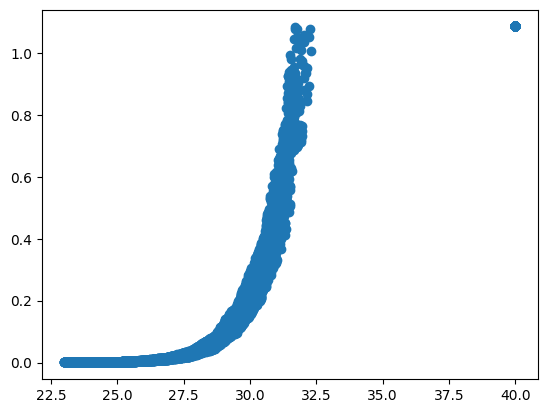

In [168]:
plt.scatter(noisy_flux, sampled_sigma)

inf 0 nan 23
inf 0 nan 23
m 4904
inf 0 nan 0
inf 0 nan 0


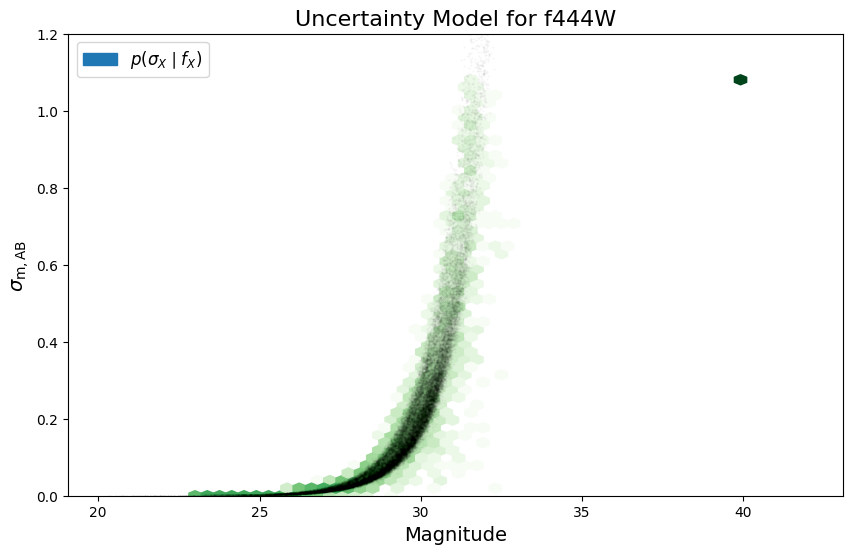

{'f444W': <ltu_ili_testing.grid.EmpiricalUncertaintyModel at 0x752640672790>}

In [16]:

file = '/home/tharvey/Downloads/JADES-Deep-GS_MASTER_Sel-f277W+f356W+f444W_v9_loc_depth_masked_10pc_EAZY_matched_selection_ext_src_UV.fits'
from sbifitter import create_uncertainity_models_from_EPOCHS_cat


create_uncertainity_models_from_EPOCHS_cat(file, 'f444W', plot=True)


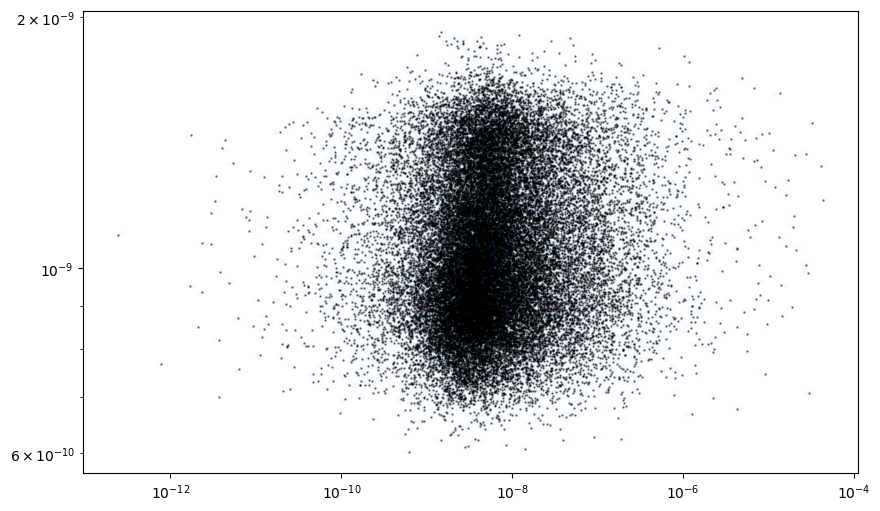

UnboundLocalError: cannot access local variable 'upper_limit_value' where it is not associated with a value

In [10]:
file = '/home/tharvey/Downloads/JADES-Deep-GS_MASTER_Sel-f277W+f356W+f444W_v9_loc_depth_masked_10pc_EAZY_matched_selection_ext_src_UV.fits'

import astropy.units as u
table = Table.read(file)

band = 'f090W'

flux = table[f'FLUX_APER_{band}_aper_corr_Jy'][:, 0]  
flux_err = table[f'FLUXERR_APER_{band}_loc_depth_10pc_Jy'][:, 0]

flux_err = table[f'loc_depth_{band}'][:, 0] * u.ABmag
flux_err = flux_err.to('Jy').value/5

# drop NaNs and -99's

mask = (flux > 0) & (flux_err > 0) 
flux = flux[mask]
flux_err = flux_err[mask]
# bin and plot as contour
plt.figure(figsize=(10, 6))

plt.hexbin(flux, flux_err, cmap='Blues', mincnt=1, bins=100, xscale='log', yscale='log')
plt.scatter(flux, flux_err, alpha=0.5, color='black', s=0.5, zorder=10)
#plt.xscale('log')
#plt.yscale('log')
plt.show()
from unyt import nJy, Jy



noise_model = EmpiricalUncertaintyModel(flux, flux_err, num_bins=100, log_bins=True, error_type='observed', flux_unit=Jy)
noisy_flux, sampled_sigma = noise_model.apply_noise_to_flux(flux, true_flux_units=Jy, out_units='AB')



#plt.scatter(noisy_flux, sampled_sigma, alpha=0.1, color='green', s=0.1)
plt.hexbin(noisy_flux, sampled_sigma, gridsize=50, cmap='Greens', mincnt=1, alpha=1, label=r'$p\left(\sigma_X \mid f_X\right)$', xscale='log', yscale='linear')
fmag = table[f'MAG_APER_{band}_aper_corr'][:, 0]
ferr = table[f'MAGERR_APER_{band}_u1_loc_depth'][:, 0]

mask = (fmag != -99) & (ferr != -99) & (fmag > 0) & (ferr > 0)
fmag = fmag[mask]
ferr = ferr[mask]


plt.scatter(fmag, ferr, alpha=0.03, color='black', s=0.1, zorder=10)
#plt.hexbin(depth_model_fitter.feature_array[:, 0], depth_model_fitter.feature_array[:, 20], mincnt=1,extent=(23, 40, 0, 1), cmap='Oranges', gridsize=50, alpha=0.5, label='Flat Depth Model')

plt.legend()

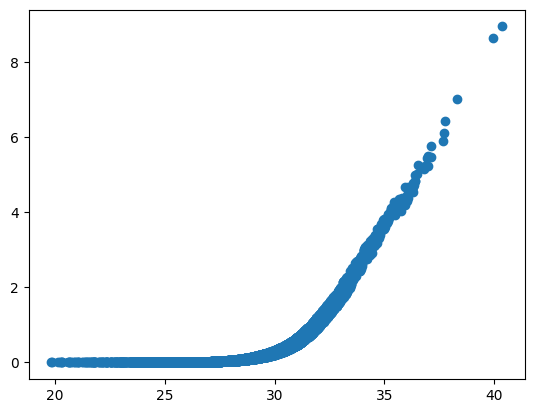

In [234]:
plt.scatter(noisy_flux, sampled_sigma)

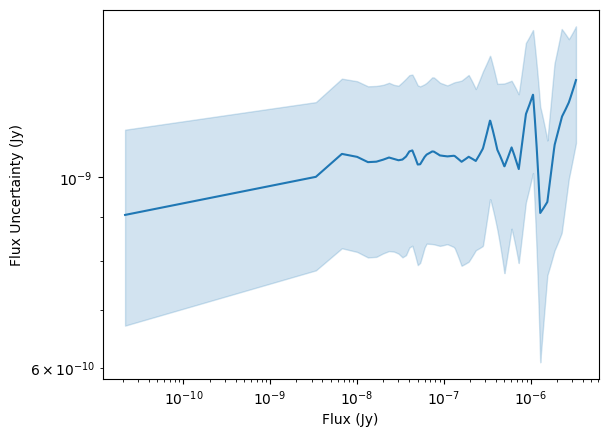

In [238]:
noise_model.plot_sigma()
plt.xscale('log')
plt.yscale('log')

1.319201122142004e-06
min 0.01
1.2125309096746621e-05
1.4442683059492895e-06
min 0.01
2.0233674300859105e-06
3.882348876759289e-06
min 0.01
5.197367677235044e-06
6.696610373945173e-06
min 0.01
2.4519989570523593e-06
1.2585379084464886e-06
min 0.01
3.6784300839517845e-07
2.8102543101940837e-06
min 0.01
4.865948333486262e-06
4.461316732014132e-06
min 0.01
6.761464625843811e-07
4.471353066257029e-06
min 0.01
1.4823553229071396e-06
9.519054785870386e-07
min 0.01
6.84720854942503e-06


(np.float32(20.87883), np.float32(31.764267))

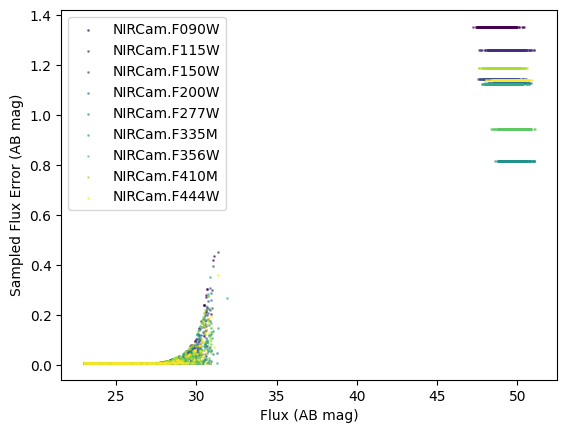

In [13]:
jades_filters = ['f090W', 'f115W', 'f150W', 'f200W', 'f277W', 'f335M', 'f356W', 'f410M', 'f444W']

empirical_noise_models = {}
data = []
for filter_name in jades_filters:
    fitter_filter_name = f'NIRCam.{filter_name.upper()}'

    flux = table[f'MAG_APER_{filter_name}_aper_corr'][:, 0]
    data.append(flux)

    flux_err_l = table[f'MAGERR_APER_{filter_name}_l1_loc_depth'][:, 0]
    flux_err_u = table[f'MAGERR_APER_{filter_name}_u1_loc_depth'][:, 0]

    mask = (flux != -99) & (flux_err_l != -99) & (flux_err_u != -99) & (flux_err_l > 0) & (flux_err_u > 0)
    flux = flux[mask]
    flux_err_l = flux_err_l[mask]
    flux_err_u = flux_err_u[mask]

    noise_model = EmpiricalUncertaintyModel(flux, (flux_err_l + flux_err_u) / 2,
                                            num_bins=20, log_bins=True, 
                                            min_flux_error=0.01,
                                            sigma_clip=10,
                                            upper_limits=True,
                                            treat_as_upper_limits_below=0.5,
                                            error_type='observed',)
    empirical_noise_models[fitter_filter_name] = noise_model


# Plot median line for all
flux_test = np.linspace(23, 31, 1000)
colors = plt.cm.viridis(np.linspace(0, 1, len(empirical_noise_models)))
for a, (filter_name, noise_model) in enumerate(empirical_noise_models.items()):
    noisy_flux, sampled_sigma = noise_model.apply_noise_to_flux(flux_test, true_flux_units='AB')
    plt.scatter(noisy_flux, sampled_sigma, label=f'{filter_name}', alpha=0.5, color=colors[a], s=1)
plt.xlabel('Flux (AB mag)')
plt.ylabel('Sampled Flux Error (AB mag)')

plt.legend()
    
empirical_noise_models['NIRCam.F444W'].get_valid_flux_range()




In [12]:
np.sum(np.isnan(sampled_sigma) | np.isinf(sampled_sigma) | np.isnan(noisy_flux) | np.isinf(noisy_flux))


np.int64(0)

(np.float32(7.7805276e-11), np.float32(1.7680562e-05))

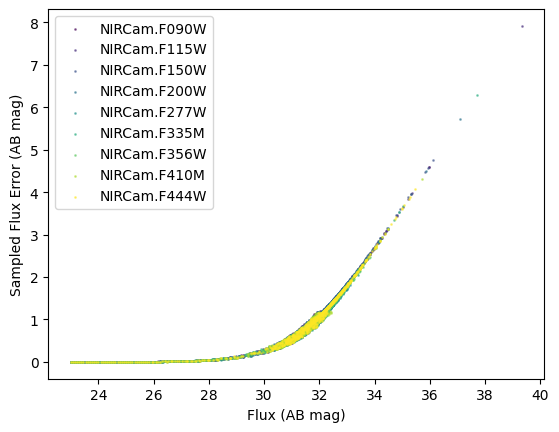

In [8]:
jades_filters = ['f090W', 'f115W', 'f150W', 'f200W', 'f277W', 'f335M', 'f356W', 'f410M', 'f444W']

empirical_noise_models = {}

for filter_name in jades_filters:
    fitter_filter_name = f'NIRCam.{filter_name.upper()}'

    flux = table[f'FLUX_APER_{filter_name}_aper_corr_Jy'][:, 0]
    flux_err = table[f'loc_depth_{band}'][:, 0] * u.ABmag
    flux_err = flux_err.to('Jy').value/5

    mask = (flux != -99) & (flux_err != -99) & (flux_err > 0)
    flux = flux[mask]
    flux_err = flux_err[mask]

    noise_model = EmpiricalUncertaintyModel(flux, flux_err,
                                            num_bins=100, log_bins=True, 
                                            min_flux_error=0,
                                            sigma_clip=10,
                                            error_type='observed',
                                            upper_limits=True,
                                            treat_as_upper_limits_below=0.5,
                                            flux_unit=Jy)
    empirical_noise_models[fitter_filter_name] = noise_model


# Plot median line for all
flux = np.linspace(23, 100, 1000)
colors = plt.cm.viridis(np.linspace(0, 1, len(empirical_noise_models)))
for a, (filter_name, noise_model) in enumerate(empirical_noise_models.items()):
    noisy_flux, sampled_sigma = noise_model.apply_noise_to_flux(flux, true_flux_units="AB", out_units='AB')
    plt.scatter(noisy_flux, sampled_sigma, label=f'{filter_name}', alpha=0.5, color=colors[a], s=1)
plt.xlabel('Flux (AB mag)')
plt.ylabel('Sampled Flux Error (AB mag)')

plt.legend()
    
empirical_noise_models['NIRCam.F444W'].get_valid_flux_range()


In [376]:
np.sum(np.isnan(sampled_sigma) | np.isinf(sampled_sigma) | np.isnan(noisy_flux) | np.isinf(noisy_flux))


np.int64(4)

In [16]:
empirical_model_fitter = SBI_Fitter.init_from_hdf5('Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_empirical_noise_NOLIM', 
                                grid_path, return_output=False)

empirical_model_fitter.create_feature_array_from_raw_photometry(extra_features=[], 
                                                                normalize_method=None,
                                                                include_errors_in_feature_array=True,
                                                                scatter_fluxes=4,
                                                                empirical_noise_models=empirical_noise_models,
                                                                norm_mag_limit=5000,
                                                                photometry_to_remove=[filt for filt in empirical_model_fitter.raw_photometry_names if filt not in list(empirical_noise_models.keys())],
);



Removing 11 photometry filters: ['NIRCam.F070W' 'NIRCam.F140M' 'NIRCam.F162M' 'NIRCam.F182M'
 'NIRCam.F210M' 'NIRCam.F250M' 'NIRCam.F300M' 'NIRCam.F360M'
 'NIRCam.F430M' 'NIRCam.F460M' 'NIRCam.F480M']
Using empirical noise models with 4 scatters per row.


Applying empirical noise models: 100%|██████████| 9/9 [00:00<00:00, 1524.77it/s]

NIRCam.F090W
NIRCam.F115W
NIRCam.F150W
NIRCam.F200W
NIRCam.F277W
NIRCam.F335M
here
NIRCam.F356W
here
NIRCam.F410M
here
here
here
here
here
here


Original number of simulated samples: 390761
Number of outliers removed (5-sigma): 200280
Number of samples remaining: 190481


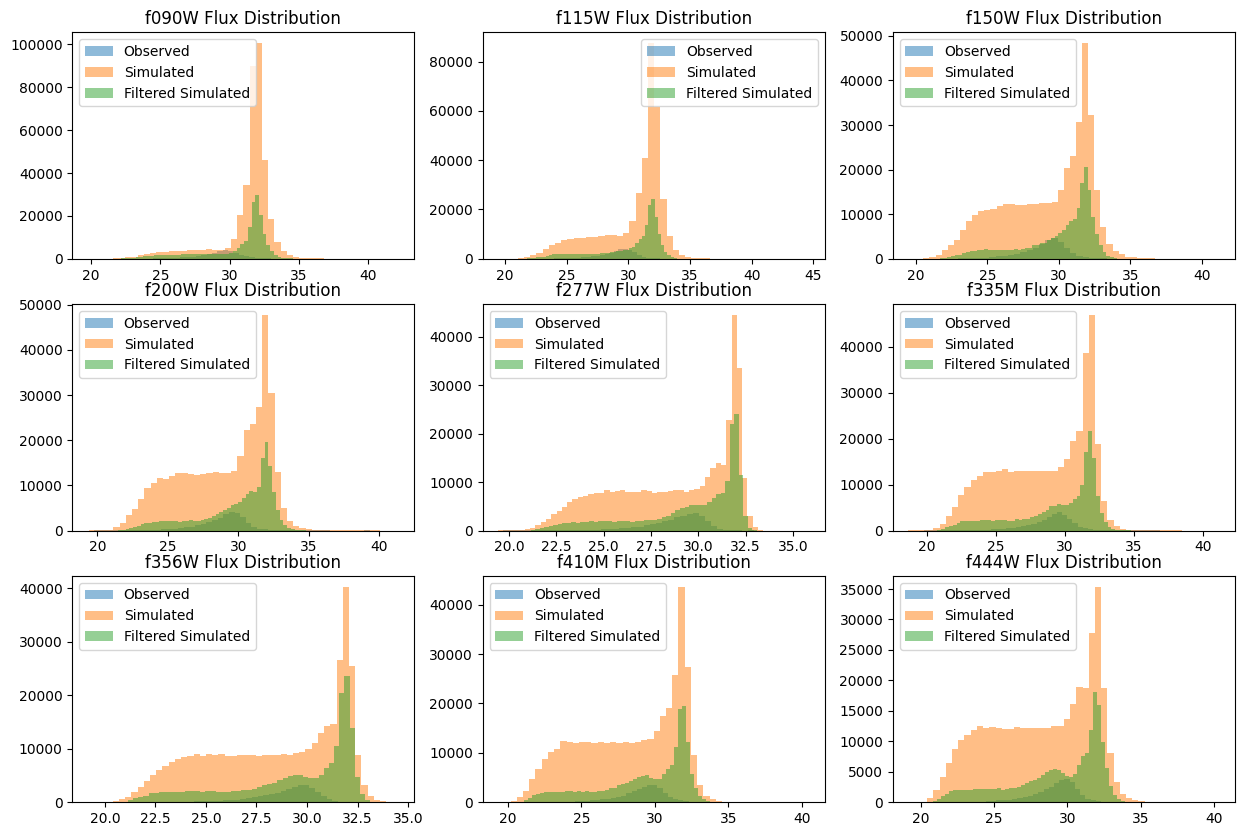

In [384]:
data = np.array(data)
observed_photometry = np.array(data).T

# drop any row with a -99

mask = np.all(observed_photometry != 99, axis=1)
observed_photometry = observed_photometry[mask]

from sbifitter import filter_out_of_distribution

# DO this with real data
simulated_photometry = empirical_model_fitter.feature_array[:, :9]

filtered_photometry, removed_indices = filter_out_of_distribution(
    observed_photometry=observed_photometry.T,
    simulated_photometry=simulated_photometry.T,
    sigma_threshold=5
)

# compare distribution of fluxes before and after filtering

fig, axs = plt.subplots(3, np.ceil(len(observed_photometry[0]) / 3).astype(int), figsize=(15, 10))
axs = axs.flatten()

for i, ax in enumerate(axs):
    if i < len(observed_photometry[0]):
        ax.hist(observed_photometry[:, i], bins=50, alpha=0.5, label='Observed')
        ax.hist(simulated_photometry[:, i], bins=50, alpha=0.5, label='Simulated')
        ax.hist(filtered_photometry[i], bins=50, alpha=0.5, label='Filtered Simulated')
        ax.set_title(f'{jades_filters[i]} Flux Distribution')
        ax.legend()
    else:
        ax.axis('off')


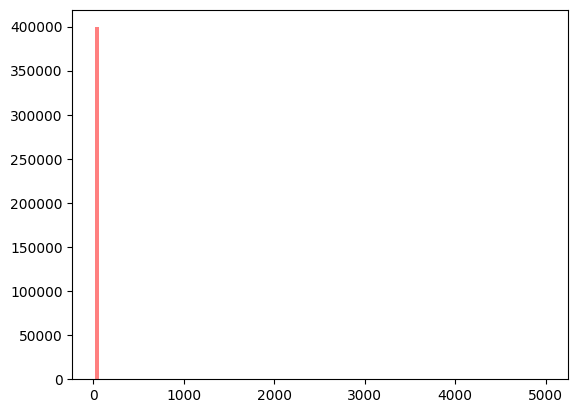

In [350]:
plt.hist(empirical_model_fitter.feature_array[:, 8], bins=100, alpha=0.5, label='Model Flux', color='red');

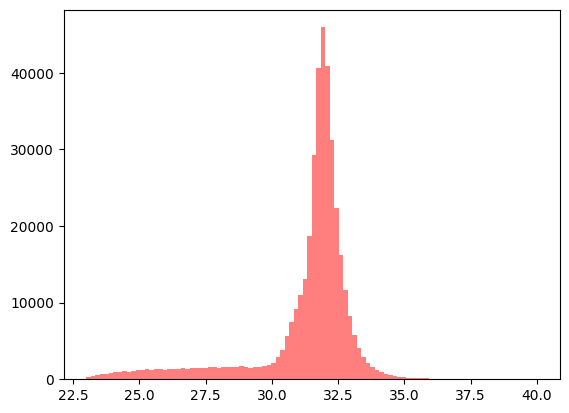

In [347]:
plt.hist(noisy_flux, bins=100, alpha=0.5, label='Noisy Flux')
plt.hist(flux, bins=100, alpha=0.5, label='True Flux', color='orange');
plt.hist(selected_cat['MAG_APER_f090W_aper_corr'][:, 0], bins=100, alpha=0.5, label='Catalog Flux', color='green', range=(23, 40));
plt.hist(empirical_model_fitter.feature_array[:, 0], bins=100, alpha=0.5, label='Model Flux', color='red',range=(23, 40));

INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 1.


/home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_empirical_noise_NOLIM/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_empirical_noise_NOLIMv2_empirical_noise_uplim_params.pkl
Splitting dataset with 390761 samples into training and testing sets with 0.80 train fraction.
---------------------------------------------
Prior ranges:
---------------------------------------------
redshift: 5.00 - 12.00
log_mass: 6.00 - 11.50
sps_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1/tau_v: 0.00 - 2.00
sps_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1/tau: 0.05 - 2.50
sps_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1/peak_age: 0.00 - 990.40
sps_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1/log10metallicity: -3.00 - -1.39
---------------------------------------------
Creating nsf network with NPE engine and lampe backend.
     hidden_features: 180
     num_transforms: 16


0 epochs [00:00, ? epochs/s]

66 epochs [1:58:02, 107.31s/ epochs, loss=4.42, loss_val=5.46]
INFO:root:It took 7082.378413677216 seconds to train models.
INFO:root:Saving model to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_empirical_noise_NOLIM
INFO:root:Sampling models with [1000] samples each.


Time to train model(s): 1:58:03.206813


Drawing 1000 posterior samples: 1961it [00:00, 21052.20it/s]            
INFO:root:Saving single posterior plot to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_empirical_noise_NOLIM/plots/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_empirical_noise_NOLIM_70_plot_single_posterior.jpg...
  7%|▋         | 5363/78153 [08:11<1:51:09, 10.91it/s]


KeyboardInterrupt: 

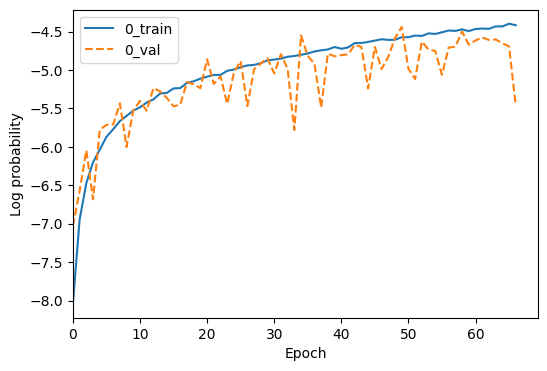

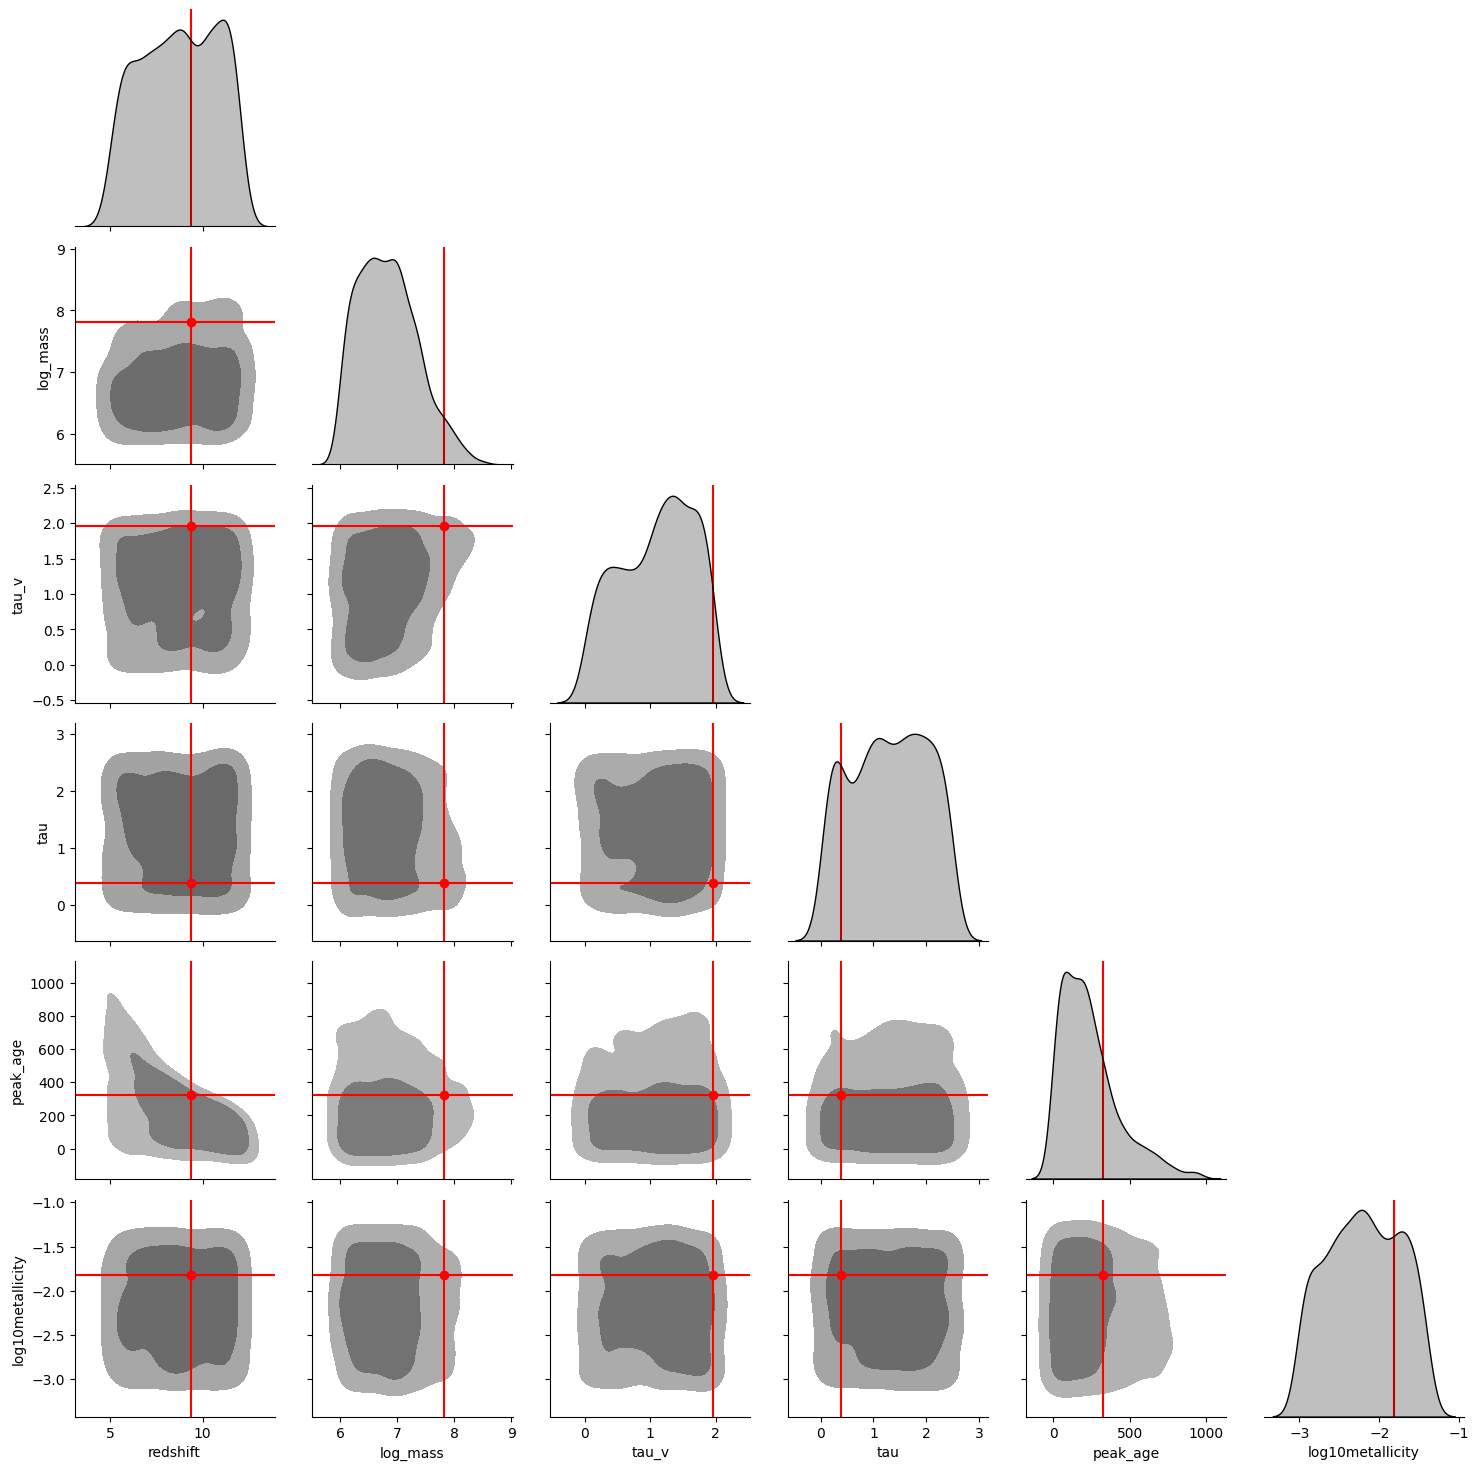

In [385]:
empirical_model_fitter.run_single_sbi(
                    n_nets=1,
                    backend='lampe',
                    engine='NPE', 
                    name_append='v2_empirical_noise_uplim',
                    stop_after_epochs=15, 
                    hidden_features=180,
                    learning_rate=0.0004,
                    num_transforms=16,
                    model_type='nsf')

In [1]:
selected_cat = table[table['final_sample_highz_fsps_larson_no_bd'] == True]

selected_cat['NUMBER', 'MAG_APER_f444W_aper_corr', 'zbest_fsps_larson']

id = 816
plot = True
all_samples = []
X_tests = []
for id in selected_cat['NUMBER']:
        
    row = selected_cat[selected_cat['NUMBER'] == id]

    flux = []
    err = []

    for filter_name in jades_filters:
        f = row[f'MAG_APER_{filter_name}_aper_corr'][0][0]
        if f == 99:
            f = 50

        flux.append(f)
        errsL = row[f'MAGERR_APER_{filter_name}_l1_loc_depth'][0][0]
        errsU = row[f'MAGERR_APER_{filter_name}_u1_loc_depth'][0][0]
        #print(errsL, errsU)
        if errsL == -99 and errsU != -99:
            if errsU < 0.01:
                err.append(0.01)
            err.append(errsU)
        elif errsU == -99 and errsL == -99:
            err.append(1.6)
        else:
            e = (row[f'MAGERR_APER_{filter_name}_l1_loc_depth'][0][0] + row[f'MAGERR_APER_{filter_name}_u1_loc_depth'][0][0]) / 2
            if e < 0.01:
                e = 0.01

            err.append(e)

    flux= np.array(flux)
    err = np.array(err)

    x_test = np.concatenate((flux, err))
    X_tests.append(x_test)

all_samples = empirical_model_fitter.sample_posterior(X_test=X_tests)


# plot posterior sample histogram
if plot:
    for j, id in enumerate(selected_cat['NUMBER'][:10]):
        fig, axs = plt.subplots(2, int(len(empirical_model_fitter.fitted_parameter_names)/2), figsize=(20, 6), sharey=True)
        axs = axs.flatten()
        for i, name in enumerate(empirical_model_fitter.simple_fitted_parameter_names):
            axs[i].hist(all_samples[j, :, i], bins=50, density=True, alpha=0.5, label='Posterior Samples')
            axs[i].set_title(name)
            axs[i].set_xlabel(name)
            axs[i].set_ylabel('Density')
            axs[i].legend()

        true_redshift = row['zbest_fsps_larson'][0] 
        axs[0].axvline(true_redshift, color='red', linestyle='--', label='True Redshift')
        fig.suptitle(f'Posterior Samples for ID {id}', fontsize=16)
        plt.tight_layout()
        plt.show()

all_samples = np.array(all_samples)

all_redshifts = all_samples[:, :, 0]

print(all_redshifts.shape)

NameError: name 'table' is not defined

Text(0, 0.5, 'SBI Model Redshift')

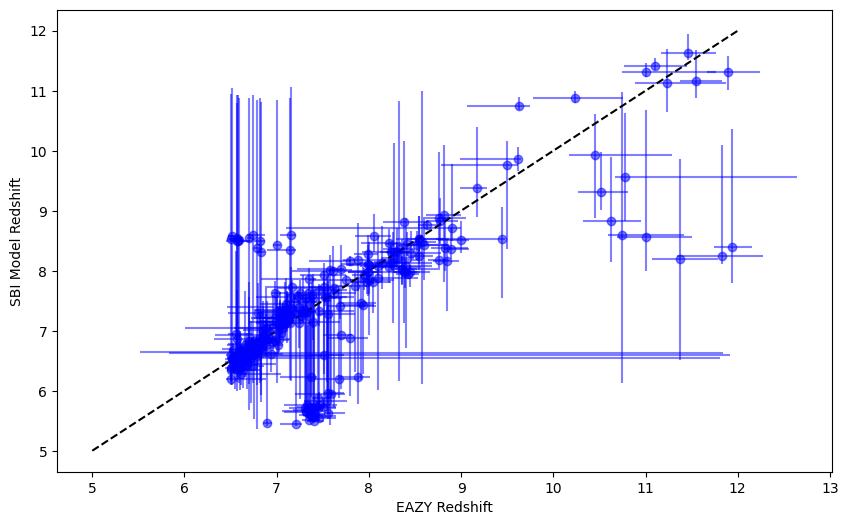

In [388]:
upper, median, lower = np.percentile(all_redshifts, [84, 50, 16], axis=1)

all_table_redshifts = np.squeeze(selected_cat['zbest_fsps_larson'].data)
all_table_upper = np.squeeze(selected_cat['zbest_16_fsps_larson'].data)
all_table_lower = np.squeeze(selected_cat['zbest_84_fsps_larson'].data)
mask = selected_cat['zbest_fsps_larson'].data < 12
all_table_redshifts = all_table_redshifts[mask]
all_table_upper = all_table_upper[mask]
all_table_lower = all_table_lower[mask]
upper = upper[mask]
median = median[mask]
lower = lower[mask]

plt.figure(figsize=(10, 6))

xerr = np.abs(np.array([all_table_redshifts - all_table_lower, all_table_upper - all_table_redshifts]))
yerr =  np.abs(np.array([lower - median, upper - median]))


plt.errorbar(all_table_redshifts, median, 
             xerr=xerr, yerr=yerr, fmt='o', 
             label='Empirical Model', color='blue', alpha=0.5)

# add a 1:1
plt.plot([5, 12], [5, 12], color='black', linestyle='--', label='1:1 Line')

plt.xlabel('EAZY Redshift')
plt.ylabel('SBI Model Redshift')

First model

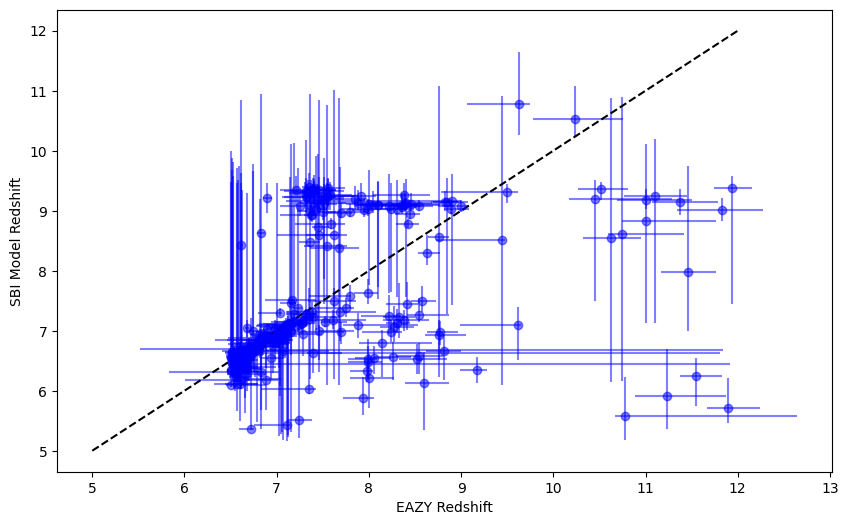

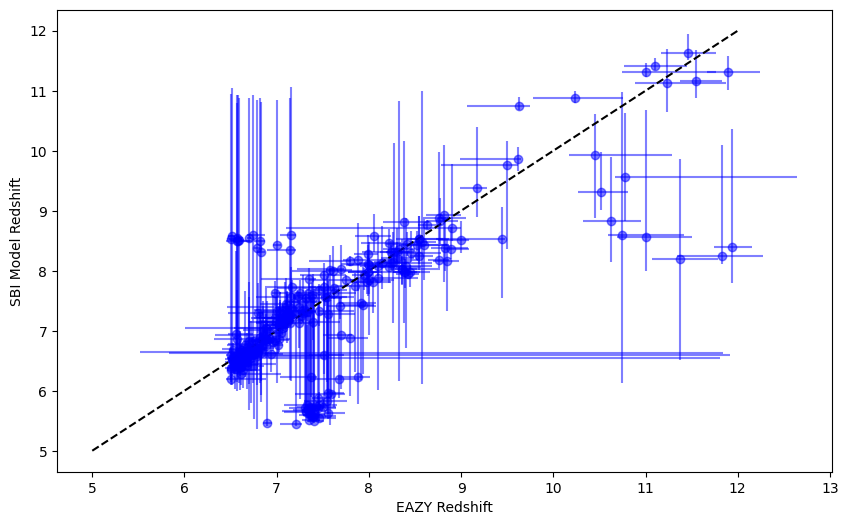

(array([0.17849349, 0.05949783, 0.01487446, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.25286577]),
 array([30.22666359, 32.20399723, 34.18133087, 36.15866451, 38.13599815,
        40.11333179, 42.09066544, 44.06799908, 46.04533272, 48.02266636,
        50.        ]),
 <BarContainer object of 10 artists>)

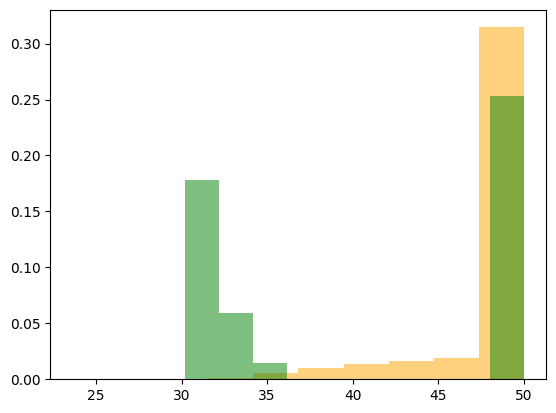

In [174]:
mask = selected_cat['zbest_fsps_larson'].data  > 8

high_plot = X_tests[mask]

samples = empirical_model_fitter.feature_array[empirical_model_fitter.fitted_parameter_array[:, 0] > 8]

plt.hist(samples[:, 0], bins=10, density=True, alpha=0.5, label='SBI Model F090W Dist (z>8)', color='orange')
plt.hist(high_plot[:, 0], bins=10, density=True, alpha=0.5, label='EAZY F090W Dist (z>8)', color='green')


In [154]:
# count rows in feature array where all fluxes are less than 30
X_tests = np.array(X_tests)
# More than half the bands are greater than mag 32.
print(np.sum(np.sum(empirical_model_fitter.feature_array[:, :8] > 32, axis=1) > 10, axis=0)/len(depth_model_fitter.feature_array) * 100)

# do the same for the real data

print(np.sum(np.sum(X_tests[:, :8] > 32, axis=1) > 10, axis=0)/len(X_tests) * 100)

0.0
0.0


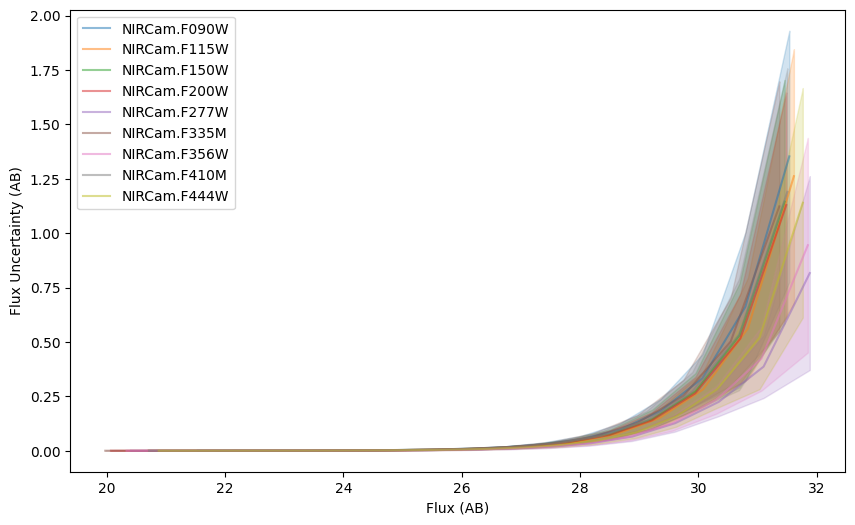

In [196]:
fig, ax = plt.subplots(figsize=(10, 6))
for pos, (name, noise_model) in enumerate(empirical_noise_models.items()):
    noise_model.plot_sigma(ax=ax, label=name, alpha=0.5)

ax.legend()


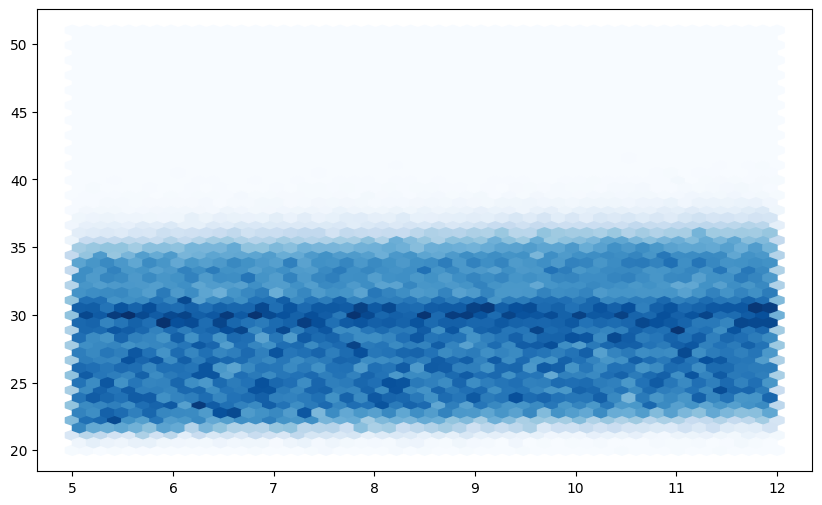

In [27]:
a=empirical_model_fitter.fitted_parameter_array[:, 0]

b=empirical_model_fitter.feature_array[:, 8]

plt.figure(figsize=(10, 6))

plt.hexbin(a, b, gridsize=50, cmap='Blues', extent=(5, 12, 20, 51))

In [7]:
from typing import Callable, Union, Optional, List, Tuple
import numpy as np
from scipy import stats
from scipy.interpolate import interp1d
from unyt import unyt_array
from tqdm import tqdm


class EmpiricalUncertaintyModel:
    """
    A class to model and sample photometric uncertainties based on an empirical
    distribution derived from observed fluxes and their uncertainties.

    The model estimates p(sigma_X | f_X) as a Gaussian N(mu_sigma_X(f_X), sigma_sigma_X(f_X)),
    where mu_sigma_X and sigma_sigma_X are interpolated from binned statistics of
    observed (sigma_X, f_X) pairs.
    """

    def __init__(
        self,
        observed_fluxes: np.ndarray,
        observed_errors: np.ndarray,
        num_bins: int = 20,
        flux_bins: Optional[np.ndarray] = None,
        log_bins: bool = True,
        min_flux_for_binning: Optional[float] = None,
        min_samples_per_bin: int = 10,
        flux_unit: str = "AB",
        min_flux_error: Optional[float] = None,
        error_type: str = 'empirical',
        sigma_clip: float = 3.0,
    ):
        """
        Initializes the model by building interpolators for the mean and
        standard deviation of observed errors as a function of flux.

        Args:
            observed_fluxes: 1D array of fluxes from a real survey.
            observed_errors: 1D array of corresponding flux uncertainties.
            num_bins: Number of bins to use for flux if flux_bins is not provided.
            flux_bins: Optional array defining the edges of flux bins.
                       If None, bins are created based on num_bins and log_bins.
            log_bins: If True and flux_bins is None, bins will be spaced
                      logarithmically. Otherwise, linearly.
            min_flux_for_binning: If provided, only fluxes above this value are
                                  used for creating the interpolation model.
                                  This can help avoid issues with very low/zero fluxes.
            min_samples_per_bin: Minimum number of samples required in a bin
                                 for it to be considered valid for interpolation.
            flux_unit: The unit of the fluxes, e.g., 'AB', 'Jy', etc.
            min_flux_error: Minimum value for the estimated flux error.
                             If None, defaults to 0.0.
            error_type: What kind of error to return. If 'empirical', then sigma_X is the standard deviation of
                        the Gaussian used to scatter the fluxes. If 'observed' then we re-estimate the errors
                        based on the scattered fluxes.
            sigma_clip: The number of standard deviations to clip the sampled uncertainties.

        """
        if len(observed_fluxes) != len(observed_errors):
            raise ValueError("observed_fluxes and observed_errors must have the same length.")

        self.sigma_clip = sigma_clip
        
        valid_mask = np.isfinite(observed_fluxes) & np.isfinite(observed_errors) & (observed_errors > 0)
        if min_flux_for_binning is not None:
            valid_mask &= (observed_fluxes > min_flux_for_binning)

        fluxes = observed_fluxes[valid_mask]
        errors = observed_errors[valid_mask]

        assert error_type in ['empirical', 'observed'], "error_type must be either 'empirical' or 'observed'."
        self.error_type = error_type

        if len(fluxes) < min_samples_per_bin * 2 : # Need at least two bins for interpolation
             raise ValueError(
                f"Not enough valid data points ({len(fluxes)}) to build the model "
                f"with min_samples_per_bin={min_samples_per_bin}. "
                "Consider adjusting min_flux_for_binning or providing more data."
            )


        if flux_bins is None:
            if log_bins:
                # Ensure fluxes are positive for log binning
                positive_flux_mask = fluxes > 0
                if not np.any(positive_flux_mask):
                    raise ValueError("No positive fluxes available for log binning. Try linear bins or check data.")
                min_f = np.min(fluxes[positive_flux_mask])
                max_f = np.max(fluxes[positive_flux_mask])
                if min_f <= 0: # Should be caught by positive_flux_mask, but as safeguard
                    min_f = np.partition(fluxes[positive_flux_mask], 1)[1] if len(fluxes[positive_flux_mask]) > 1 else 1e-9
                flux_bins = np.logspace(np.log10(min_f), np.log10(max_f), num_bins + 1)
            else:
                min_f = np.min(fluxes)
                max_f = np.max(fluxes)
                flux_bins = np.linspace(min_f, max_f, num_bins + 1)
        
        self.flux_bins_centers: List[float] = []
        bin_median_errors: List[float] = []
        bin_std_errors: List[float] = []

        for i in range(len(flux_bins) - 1):
            low_f, high_f = flux_bins[i], flux_bins[i+1]
            # Ensure the last bin includes the maximum value
            if i == len(flux_bins) - 2:
                 mask = (fluxes >= low_f) & (fluxes <= high_f)
            else:
                 mask = (fluxes >= low_f) & (fluxes < high_f)

            errors_in_bin = errors[mask]

            if len(errors_in_bin) >= min_samples_per_bin:
                self.flux_bins_centers.append(low_f + (high_f - low_f) / 2.0) # Bin center
                bin_median_errors.append(np.median(errors_in_bin))
                bin_std_errors.append(np.std(errors_in_bin))

        if len(self.flux_bins_centers) < 2: # Need at least two points for interpolation
            raise ValueError(
                f"Could not create enough valid bins ({len(self.flux_bins_centers)}) "
                f"for interpolation with min_samples_per_bin={min_samples_per_bin}. "
                "Try reducing num_bins, adjusting flux_bins, or min_flux_for_binning."
            )

        self.flux_bins_centers = np.array(self.flux_bins_centers)
        # Store the flux range for which the model is considered valid
        self._min_interp_flux = self.flux_bins_centers[0]
        self._max_interp_flux = self.flux_bins_centers[-1]

        self.flux_unit = flux_unit
        self.min_flux_error = min_flux_error if min_flux_error is not None else 0.0

        # Use 'bounds_error=False' and 'fill_value' to handle extrapolation.
        # For sigma_sigma_X (std of errors), it should not be negative.
        # We use the value from the closest bin if extrapolating.

        self.mu_sigma_interpolator_clip: Callable[[Union[float, np.ndarray]], Union[float, np.ndarray]] = interp1d(
            self.flux_bins_centers, bin_median_errors, kind='linear',
            bounds_error=False, fill_value=(bin_median_errors[0], bin_median_errors[-1])
        )
        '''self.mu_sigma_interpolator_extrap: Callable[[Union[float, np.ndarray]], Union[float, np.ndarray]] = interp1d(
            self.flux_bins_centers, bin_median_errors, kind='linear',
            bounds_error=False, fill_value='extrapolate'
        )

        def mu_sigma_interpolator(flux_values):
            output = np.empty_like(flux_values, dtype=float)
            extrapolate_mask = flux_values > self._max_interp_flux
            output[~extrapolate_mask]  = self.mu_sigma_interpolator_clip(flux_values[~extrapolate_mask])
            output[extrapolate_mask]  = self.mu_sigma_interpolator_extrap(flux_values[extrapolate_mask])
            return output'''
        
        self.mu_sigma_interpolator = self.mu_sigma_interpolator_clip

        self.sigma_sigma_interpolator_clip: Callable[[Union[float, np.ndarray]], Union[float, np.ndarray]] = interp1d(
            self.flux_bins_centers, bin_std_errors, kind='linear',
            bounds_error=False, fill_value=(bin_std_errors[0], bin_std_errors[-1])
        )
        '''self.sigma_sigma_interpolator_extrap: Callable[[Union[float, np.ndarray]], Union[float, np.ndarray]] = interp1d(
            self.flux_bins_centers, bin_std_errors, kind='linear',
            bounds_error=False, fill_value='extrapolate'
        )

        def sigma_sigma_interpolator(flux_values):

            output = np.empty_like(flux_values, dtype=float)
            extrapolate_mask = flux_values > self._max_interp_flux
            output[~extrapolate_mask]  = self.sigma_sigma_interpolator_clip(flux_values[~extrapolate_mask])
            output[extrapolate_mask]  = self.sigma_sigma_interpolator_extrap(flux_values[extrapolate_mask])
            
                    return output'''
        
        self.sigma_sigma_interpolator = self.sigma_sigma_interpolator_clip
        
        # Ensure sigma_sigma (the std dev of the error distribution) is not negative after interpolation
        # by wrapping the interpolator.
        original_sigma_sigma_interpolator = self.sigma_sigma_interpolator
        def non_negative_sigma_sigma_interpolator(flux_values):
            std_devs = original_sigma_sigma_interpolator(flux_values)
            if isinstance(std_devs, np.ndarray):
                std_devs[std_devs < 0] = 0
            elif std_devs < 0: # scalar
                std_devs = 0
            return std_devs
        self.sigma_sigma_interpolator = non_negative_sigma_sigma_interpolator
        
    def plot_sigma(self, ax=None, **kwargs):
        if ax is None:
            import matplotlib.pyplot as plt
            fig, ax = plt.subplots()
        flux_range = np.linspace(self._min_interp_flux, self._max_interp_flux, 1000)
        mu_sigma = self.mu_sigma_interpolator(flux_range)
        sigma_sigma = self.sigma_sigma_interpolator(flux_range)

        line=ax.plot(flux_range, mu_sigma, **kwargs)
        ax.fill_between(flux_range, mu_sigma - sigma_sigma, mu_sigma + sigma_sigma,
                        alpha=0.2, color=line[0].get_color())
        
        ax.set_xlabel(f"Flux ({self.flux_unit})")
        ax.set_ylabel(f"Flux Uncertainty ({self.flux_unit})")


    def get_valid_flux_range(self) -> Tuple[float, float]:
        """Returns the flux range for which the interpolator was built."""
        return self._min_interp_flux, self._max_interp_flux

    def sample_uncertainty(
        self,
        true_flux: Union[float, np.ndarray],
        max_resamples_for_positive_sigma: int = 5,
        sigma_clip = None,
    ) -> Union[float, np.ndarray, None]:
        """
        Samples a 'fake' uncertainty (sigma_prime_X) for a given true flux.

        Args:
            true_flux: The true flux value(s) for which to sample an uncertainty.
            max_resamples_for_positive_sigma: How many times to try resampling if a
                                              negative sigma_prime_X is drawn.

        Returns:
            The sampled uncertainty (sigma_prime_X). Returns np.nan for scalar input
            or an array with np.nan for problematic inputs if a positive sigma
            cannot be sampled after max_resamples.
        """

        is_scalar = np.isscalar(true_flux)
        flux_array = np.atleast_1d(true_flux)
        sampled_sigmas = np.empty_like(flux_array)

        if sigma_clip is None:
            sigma_clip = self.sigma_clip

        mu_sigma_values = self.mu_sigma_interpolator(flux_array)
        sigma_sigma_values = self.sigma_sigma_interpolator(flux_array) # Already ensures non-negativity

        for i in tqdm(range(len(flux_array)), desc="Sampling uncertainties"):
            mu_s = mu_sigma_values[i]
            sig_s = sigma_sigma_values[i]
            
            sigma_prime_x = -1.0  # Initialize to a non-physical value
            for _ in range(max_resamples_for_positive_sigma):
            #    # clip at +-3 sigma
                sigma_prime_x = stats.truncnorm.rvs(loc=mu_s, scale=sig_s, a = -sigma_clip, b=sigma_clip)
                if sigma_prime_x > 0:
                    break
            
            if sigma_prime_x <= 0:
                print(f"Warning: Could not sample a positive sigma for flux {flux_array[i]} "
                       f"(mu_sigma={mu_s:.2e}, sigma_sigma={sig_s:.2e}). Assigning NaN.")
                sampled_sigmas[i] = np.nan
            else:
                sampled_sigmas[i] = sigma_prime_x
        
        return sampled_sigmas[0] if is_scalar else sampled_sigmas

    def apply_noise_to_flux(
        self,
        true_flux: Union[float, np.ndarray],
        true_flux_units: Optional[str] = None,
        max_resamples_for_positive_sigma: int = 5,
        out_units: Optional[str] = None,
    ) -> Tuple[Union[float, np.ndarray, None], Union[float, np.ndarray, None]]:
        """
        Applies noise to a true flux by first sampling an uncertainty
        and then adding Gaussian noise.

        Args:
            true_flux: The true flux value(s).
            max_resamples_for_positive_sigma: Passed to sample_uncertainty.

        Returns:
            A tuple (noisy_flux, sampled_sigma_prime).
            Returns (np.nan, np.nan) for problematic inputs where positive sigma
            could not be determined.
        """
        if self.flux_unit != true_flux_units:
            if self.flux_unit == "AB":
                if not isinstance(true_flux, unyt_array):
                    true_flux = unyt_array(true_flux, units=true_flux_units).to("Jy").value
                else:
                    true_flux = true_flux.to("Jy").value

                true_flux = -2.5 * np.log10(true_flux) + 8.9 
            else:
                true_flux = unyt_array(true_flux, units=true_flux_units).to(self.flux_unit).value

                
        is_scalar = np.isscalar(true_flux)
        flux_array = np.atleast_1d(true_flux)

        flux_array = np.array(flux_array, dtype=float)  # Ensure it's a float array for calculations

        sampled_sigma_prime = self.sample_uncertainty(flux_array, max_resamples_for_positive_sigma)
        
        # Apply minimum flux error
        sampled_sigma_prime[sampled_sigma_prime < self.min_flux_error] = self.min_flux_error

        noisy_flux_array = flux_array + stats.truncnorm.rvs(loc=0, scale=sampled_sigma_prime, a=-self.sigma_clip, b=self.sigma_clip)
          # Ensure noise is not below the minimum error
        noisy_flux_array[np.isnan(sampled_sigma_prime)] = np.nan  # Handle NaNs from sampling

        if self.error_type == 'observed':
            # Re-estimate the errors based on the scattered fluxes
            sampled_sigma_prime = self.sample_uncertainty(noisy_flux_array, max_resamples_for_positive_sigma, sigma_clip=1)
            sampled_sigma_prime[sampled_sigma_prime < self.min_flux_error] = self.min_flux_error

        # convert back to original units if necessary

        if out_units is None:
            out_units = true_flux_units

        if self.flux_unit != out_units:
            if self.flux_unit == "AB":
                raise NotImplementedError()
            else:
                noisy_flux_array = unyt_array(noisy_flux_array, units=self.flux_unit).to(true_flux_units).value
                sampled_sigma_prime = unyt_array(sampled_sigma_prime, units=self.flux_unit).to(true_flux_units).value


        if is_scalar:
            return noisy_flux_array[0], sampled_sigma_prime[0]
        return noisy_flux_array, sampled_sigma_prime
 

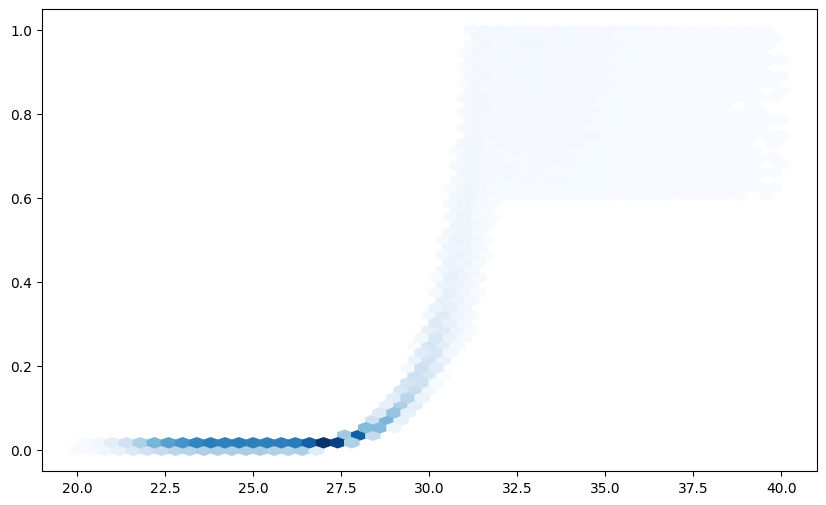

(array([2.0000e+01, 4.4000e+01, 2.3800e+02, 1.7090e+03, 4.3630e+03,
        7.7060e+03, 1.0812e+04, 1.2628e+04, 1.4047e+04, 1.4700e+04,
        1.4594e+04, 1.4644e+04, 1.4505e+04, 1.4523e+04, 1.4720e+04,
        1.4729e+04, 1.4503e+04, 1.4700e+04, 1.4795e+04, 1.5462e+04,
        1.6370e+04, 1.7470e+04, 1.7033e+04, 1.5034e+04, 1.2827e+04,
        1.2213e+04, 1.2526e+04, 1.2947e+04, 1.2753e+04, 1.2228e+04,
        1.1577e+04, 9.8150e+03, 7.9730e+03, 5.8370e+03, 3.9810e+03,
        2.5350e+03, 1.5050e+03, 9.2400e+02, 4.4500e+02, 2.7600e+02,
        1.4800e+02, 7.1000e+01, 3.2000e+01, 1.7000e+01, 1.2000e+01,
        7.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([19.15137863, 19.65389061, 20.15640068, 20.65891266, 21.16142464,
        21.66393661, 22.16644669, 22.66895866, 23.17147064, 23.67398071,
        24.17649269, 24.67900467, 25.18151474, 25.68402672, 26.1865387 ,
        26.68904877, 27.19156075, 27.69407272, 28.19658279, 28.69909477,
        29.20160675, 29.70

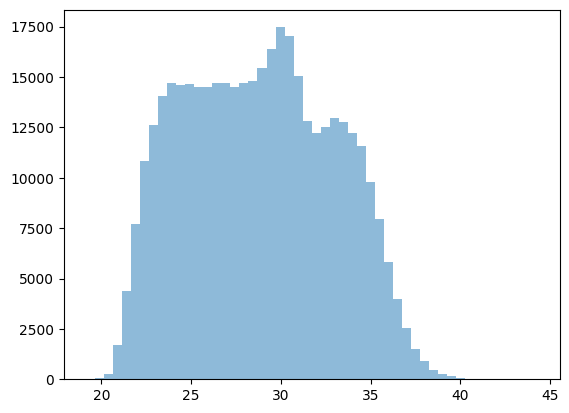

In [16]:

b=empirical_model_fitter.feature_array[:, 8]
c=empirical_model_fitter.feature_array[:, -1]

plt.figure(figsize=(10, 6))
plt.hexbin(b, c, gridsize=50, cmap='Blues', extent=(20, 40, 0, 1), mincnt=1)

plt.show()

plt.hist(b, bins=50, density=False, alpha=0.5, label='Feature 8')

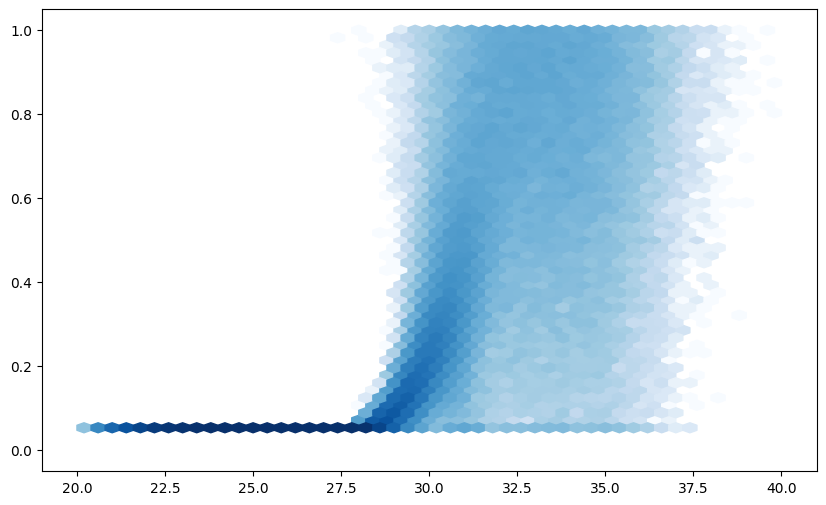

In [ ]:
# Count how many rows of feature_array have all features > 34

count_above_34 = np.sum(np.all(empirical_model_fitter.feature_array > 34, axis=1))

### Model testing

In [277]:
from synthesizer.emission_models.dust.emission import IR_templates
from synthesizer.grid import Grid
from synthesizer.parametric import SFH, ZDist

path = '/home/tharvey/work/synthesizer_grids'

dl07_grid = Grid('draine_li_dust_emission_grid_MW_3p1', grid_dir=path, read_lines=False)


In [280]:
from unyt import Msun, Angstrom

lam = 10 ** (np.arange(3.0, 8.0, 0.01)) 
lam = lam * Angstrom  # Convert to Angstroms

for mdust in [1e7, 1e8, 5e8, 1e9, 5e9]:
    model = IR_templates(
        dl07_grid, mdust=mdust * Msun, verbose=False
    )
    sed = model.get_spectra(lam)

    # Normalise the SED to the bolometric luminosity
    sed._lnu /= sed._bolometric_luminosity

    # And plot...
    plt.loglog(
        sed.lam,
        sed.luminosity,
        label="{:.1e} Msun, <U>={:.2f}".format(mdust, model.u_avg),
    )
    plt.title("Draine & Li 2007")

plt.xlabel(r"$ \lambda / \AA$")
plt.ylabel(r"$ L_{\nu} / L_{bol}$")
plt.ylim(10**-3, 1)
plt.legend()
plt.show()

InvalidUnitOperation: Tried to multiply a Unit object with 'None' (type <class 'NoneType'>). This behavior is undefined.

In [58]:
mu_s = [10, 10]
sig_s = 1

sigma_prime_x = stats.truncnorm.rvs(loc=mu_s, scale=sig_s, a=-10, b=1, size=1000)

plt.hist(sigma_prime_x, bins=50, density=True, alpha=0.5, color='blue', label='Sampled Sigma Prime X')

ValueError: size does not match the broadcast shape of the parameters. 1000, (np.int64(1000),), (2,)

/tmp/ipykernel_502044/385143858.py:10: RuntimeWarning: invalid value encountered in log10
  mag_err_down = -2.5 * np.log10(1 - flux_err / flux)  # Convert flux error to AB mag error


Text(0, 0.5, 'AB Magnitude Error')

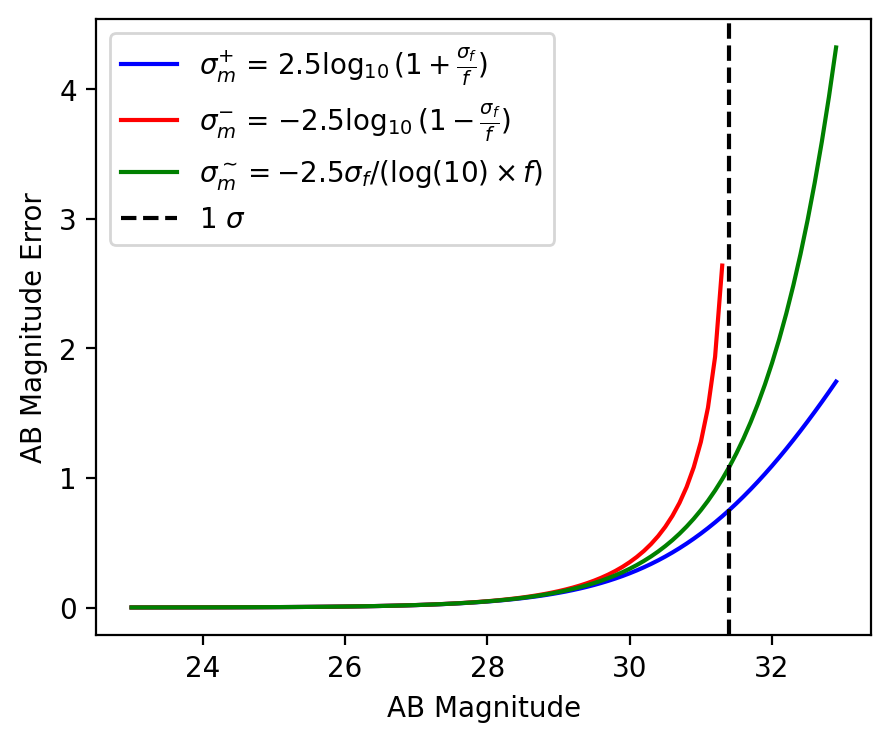

In [32]:
import numpy as np
import matplotlib.pyplot as plt

mag = np.arange(23, 33, 0.1)

flux = 10**(-0.4 * (mag - 8.9))  # Convert AB mag to flux in Jy
flux_err = 1e-9 

mag_err_up = 2.5 * np.log10(1 + flux_err / flux)  # Convert flux error to AB mag error
mag_err_down = -2.5 * np.log10(1 - flux_err / flux)  # Convert flux error to AB mag error

mag_err_aprox = np.abs(-2.5/ (np.log(10) * flux)) * flux_err  # Approximate error in AB mag
plt.figure(figsize=(5, 4), dpi=200)
plt.plot(mag, mag_err_up, label=r'$ \sigma_{m}^{+}$ = $2.5 \log_{10}(1 + \frac{\sigma_{f}}{f})$', color='blue')
plt.plot(mag, mag_err_down, label=r'$ \sigma_{m}^{-}$ = $-2.5 \log_{10}(1 - \frac{\sigma_{f}}{f})$', color='red')
plt.plot(mag, mag_err_aprox, label=r'$ \sigma_{m}^{\sim}  = -2.5\sigma_{f}/(\log(10) \times f) $', color='green')

# label1 sigma

mag_1sig = -2.5 * np.log10(flux_err) + 8.90

plt.axvline(mag_1sig, color='black', linestyle='--', label=r'1 $\sigma$')
plt.legend()
plt.xlabel('AB Magnitude')
plt.ylabel('AB Magnitude Error')
